In [341]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

In [342]:
sources_dir = "../dataset"
target_dir = "../target"

# Clean target directory
for f in os.listdir(target_dir):
    os.remove(os.path.join(target_dir, f))

source_images = [{"name": f, "image": cv.imread(os.path.join(sources_dir, f))} for f in os.listdir(sources_dir)]
sorted_source_images = sorted(source_images, key=lambda x: x["name"])

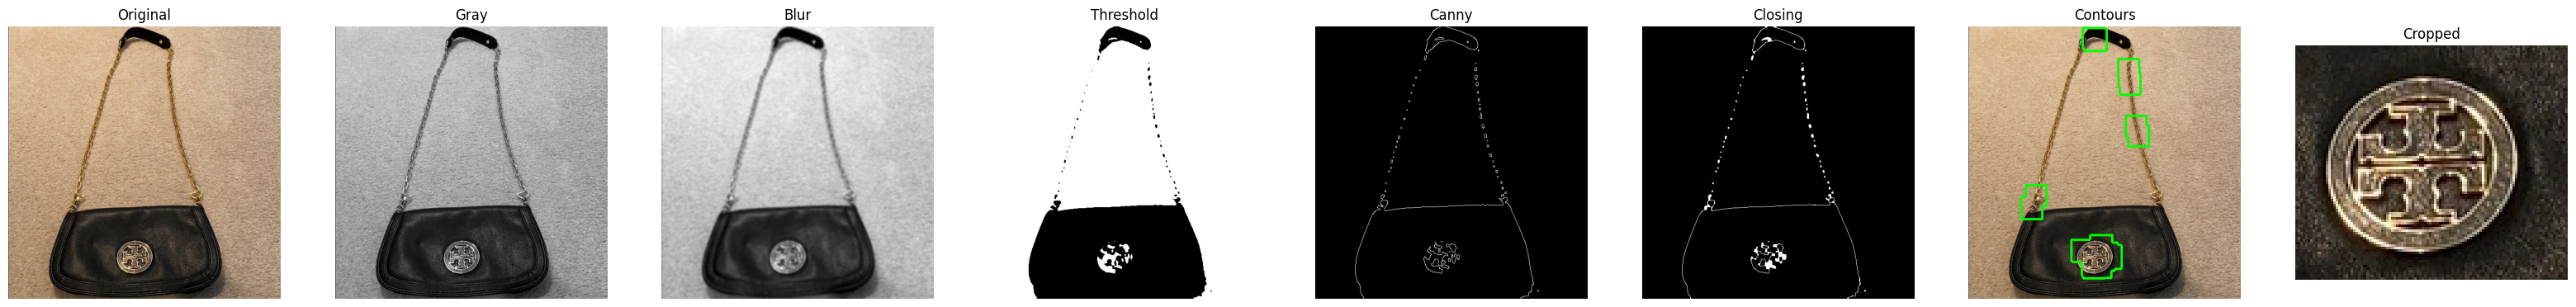

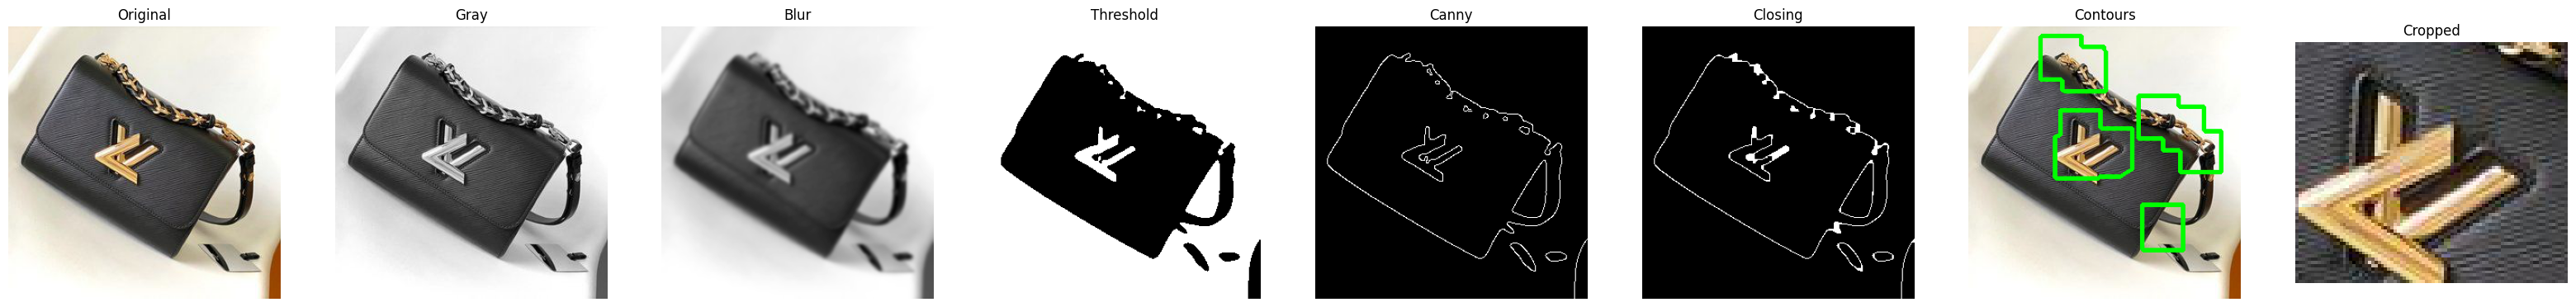

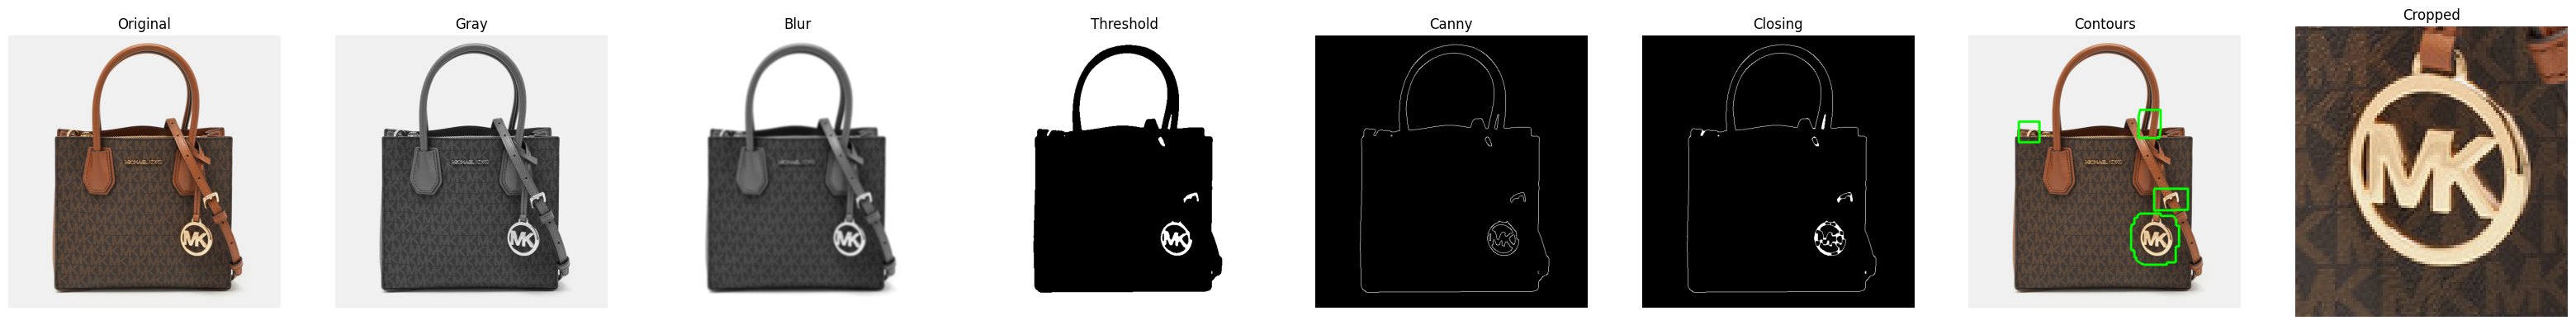

In [343]:
selected = [0, 1, 3]


selected_images = [data for i, data in enumerate(sorted_source_images) if i in selected]

for i, data in enumerate(selected_images):

    fig, axs = plt.subplots(1, 8, figsize=(40, 10))

    # Image segmentation with canny edge detection
    name, img = data["name"], data["image"]
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Otsu's thresholding after Gaussian filtering
    blur = cv.GaussianBlur(gray, (9, 9), 0)
    # thr = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
    ret, thr = cv.threshold(blur, 0, 255, cv.THRESH_OTSU)

    # Canny edge detection
    edges = cv.Canny(thr, 50, 200, apertureSize=3, L2gradient=True)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    closing = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)
    dilation = cv.dilate(opening, kernel, iterations=10)

    # Find contours
    contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the biggest contour (c) by the area
    c = max(contours, key=cv.contourArea)

    # Get bounding box
    x, y, w, h = cv.boundingRect(c)

    # Crop image
    crop = img[y:y+h, x:x+w]

    # Plot
    axs[0].imshow(img[..., ::-1])
    axs[0].set_title("Original")

    # Gray scale
    axs[1].imshow(gray, cmap="gray")
    axs[1].set_title("Gray")

    # Blur
    axs[2].imshow(blur, cmap="gray")
    axs[2].set_title("Blur")

    axs[3].imshow(thr, cmap="gray")
    axs[3].set_title("Threshold")

    axs[4].imshow(edges, cmap="gray")
    axs[4].set_title("Canny")

    axs[5].imshow(closing, cmap="gray")
    axs[5].set_title("Closing")

    # Show contours
    drawContours = cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
    axs[6].imshow(drawContours[..., ::-1])
    axs[6].set_title("Contours")

    axs[7].imshow(crop[:, :, ::-1])
    axs[7].set_title("Cropped")

    axs[0].axis("off")
    axs[1].axis("off")
    axs[2].axis("off")
    axs[3].axis("off")
    axs[4].axis("off")
    axs[5].axis("off")
    axs[6].axis("off")
    axs[7].axis("off")

    # Save cropped image
    cv.imwrite(os.path.join(target_dir, name), crop)

    # Save plot
    plt.savefig(os.path.join(target_dir, "plot_" + name))
    plt.show()

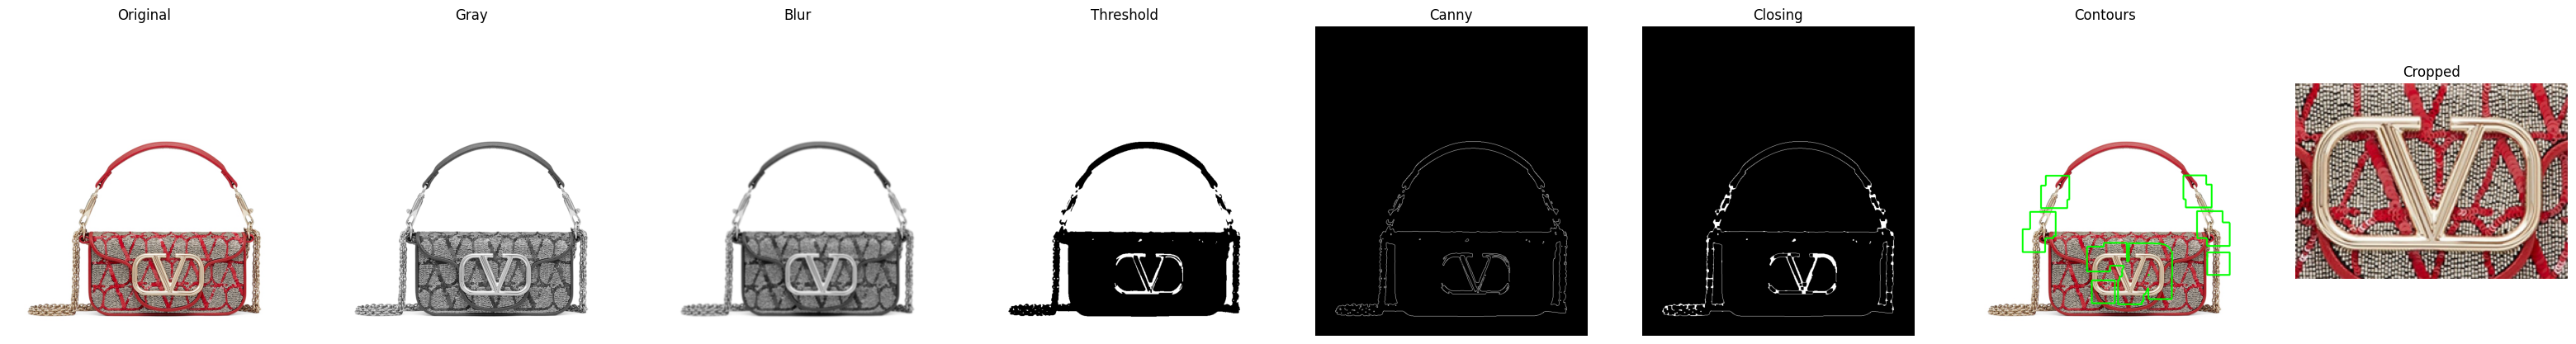

In [344]:
selected = [5]

selected_images = [data for i, data in enumerate(sorted_source_images) if i in selected]

for i, data in enumerate(selected_images):
    fig, axs = plt.subplots(1, 8, figsize=(40, 10))

    # Image segmentation with canny edge detection
    name, img = data["name"], data["image"]
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Otsu's thresholding after Gaussian filtering
    blur = cv.GaussianBlur(gray, (9, 9), 0)
    # thr = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
    ret, thr = cv.threshold(blur, 0, 255, cv.THRESH_OTSU)

    # Canny edge detection
    edges = cv.Canny(thr, 50, 200, apertureSize=3, L2gradient=True)

    # Morphological operations
    kernel = np.ones((7, 7), np.uint8)
    closing = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)
    dilation = cv.dilate(opening, kernel, iterations=10)

    # Find contours
    contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the biggest contour (c) by the area
    c = max(contours, key=cv.contourArea)

    # Get bounding box
    x, y, w, h = cv.boundingRect(c)

    # Crop image
    crop = img[y:y+h, x:x+w]

    # Plot
    axs[0].imshow(img[..., ::-1])
    axs[0].set_title("Original")

    # Gray scale
    axs[1].imshow(gray, cmap="gray")
    axs[1].set_title("Gray")

    # Blur
    axs[2].imshow(blur, cmap="gray")
    axs[2].set_title("Blur")

    axs[3].imshow(thr, cmap="gray")
    axs[3].set_title("Threshold")

    axs[4].imshow(edges, cmap="gray")
    axs[4].set_title("Canny")

    axs[5].imshow(closing, cmap="gray")
    axs[5].set_title("Closing")

    # Show contours
    drawContours = cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
    axs[6].imshow(drawContours[..., ::-1])
    axs[6].set_title("Contours")

    axs[7].imshow(crop[:, :, ::-1])
    axs[7].set_title("Cropped")

    axs[0].axis("off")
    axs[1].axis("off")
    axs[2].axis("off")
    axs[3].axis("off")
    axs[4].axis("off")
    axs[5].axis("off")
    axs[6].axis("off")
    axs[7].axis("off")

    # Save cropped image
    cv.imwrite(os.path.join(target_dir, name), crop)

    # Save plot
    plt.savefig(os.path.join(target_dir, "plot_" + name))
    plt.show()

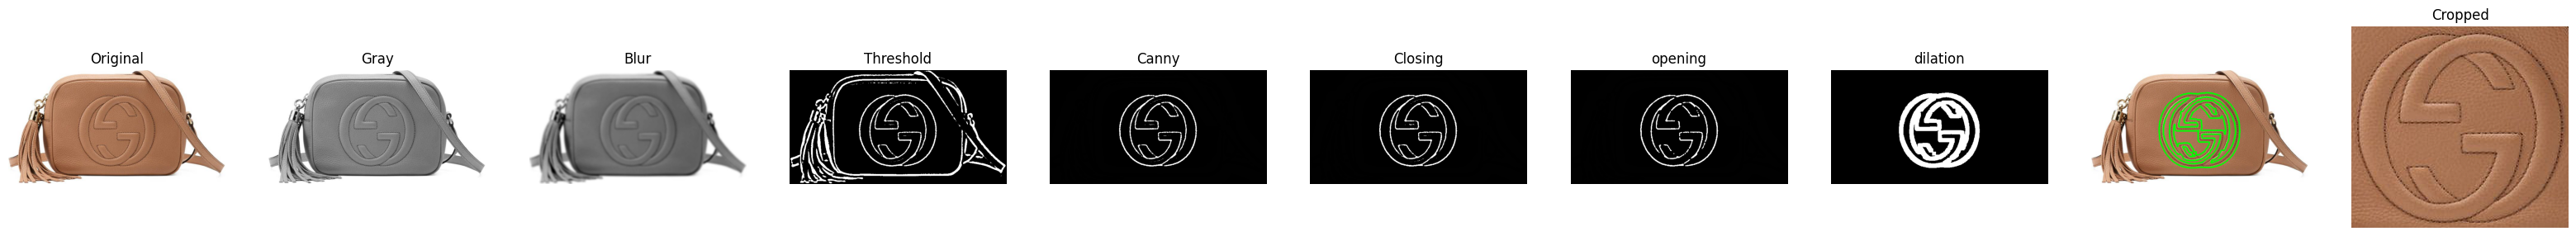

In [345]:
selected = [2]

selected_images = [data for i, data in enumerate(sorted_source_images) if i in selected]

for i, data in enumerate(selected_images):
    fig, axs = plt.subplots(1, 10, figsize=(40, 10))

    # Image segmentation with canny edge detection
    name, img = data["name"], data["image"]
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Otsu's thresholding after Gaussian filtering
    blur = cv.GaussianBlur(gray, (15, 15), 0)
    thr = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)

    # Canny edge detection
    edges = cv.Canny(blur, 10, 90, apertureSize=3, L2gradient=True)
    edges_dil = cv.dilate(edges, np.ones((3, 3), np.uint8), iterations=30)

    logo_edge = thr - edges_dil

    # Morphological operations
    kernel = np.ones((3, 3), np.uint8)
    closing = cv.morphologyEx(logo_edge, cv.MORPH_CLOSE, kernel)
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)
    dilation = cv.dilate(opening, kernel, iterations=5)
    dilation = np.where(dilation == 255, 255, 0).astype(np.uint8)

    # Fill holes
    contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the biggest contour (c) by the area
    c = max(contours, key=cv.contourArea)

    # Get bounding box
    x, y, w, h = cv.boundingRect(c)

    # Crop image
    crop = img[y:y+h, x:x+w]

    # Plot
    axs[0].imshow(img[..., ::-1])
    axs[0].set_title("Original")

    # Gray scale
    axs[1].imshow(gray, cmap="gray")
    axs[1].set_title("Gray")

    # Blur
    axs[2].imshow(blur, cmap="gray")
    axs[2].set_title("Blur")

    axs[3].imshow(thr, cmap="gray")
    axs[3].set_title("Threshold")

    axs[4].imshow(logo_edge, cmap="gray")
    axs[4].set_title("Canny")

    axs[5].imshow(closing, cmap="gray")
    axs[5].set_title("Closing")

    axs[6].imshow(opening, cmap="gray")
    axs[6].set_title("opening")

    axs[7].imshow(dilation, cmap="gray")
    axs[7].set_title("dilation")

    # Show contours
    drawContours = cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
    axs[8].imshow(drawContours[..., ::-1])

    axs[9].imshow(crop[:, :, ::-1])
    axs[9].set_title("Cropped")

    axs[0].axis("off")
    axs[1].axis("off")
    axs[2].axis("off")
    axs[3].axis("off")
    axs[4].axis("off")
    axs[5].axis("off")
    axs[6].axis("off")
    axs[7].axis("off")
    axs[8].axis("off")
    axs[9].axis("off")

    # Save cropped image
    cv.imwrite(os.path.join(target_dir, name), crop)

    # Save plot
    plt.savefig(os.path.join(target_dir, "plot_" + name))
    plt.show()

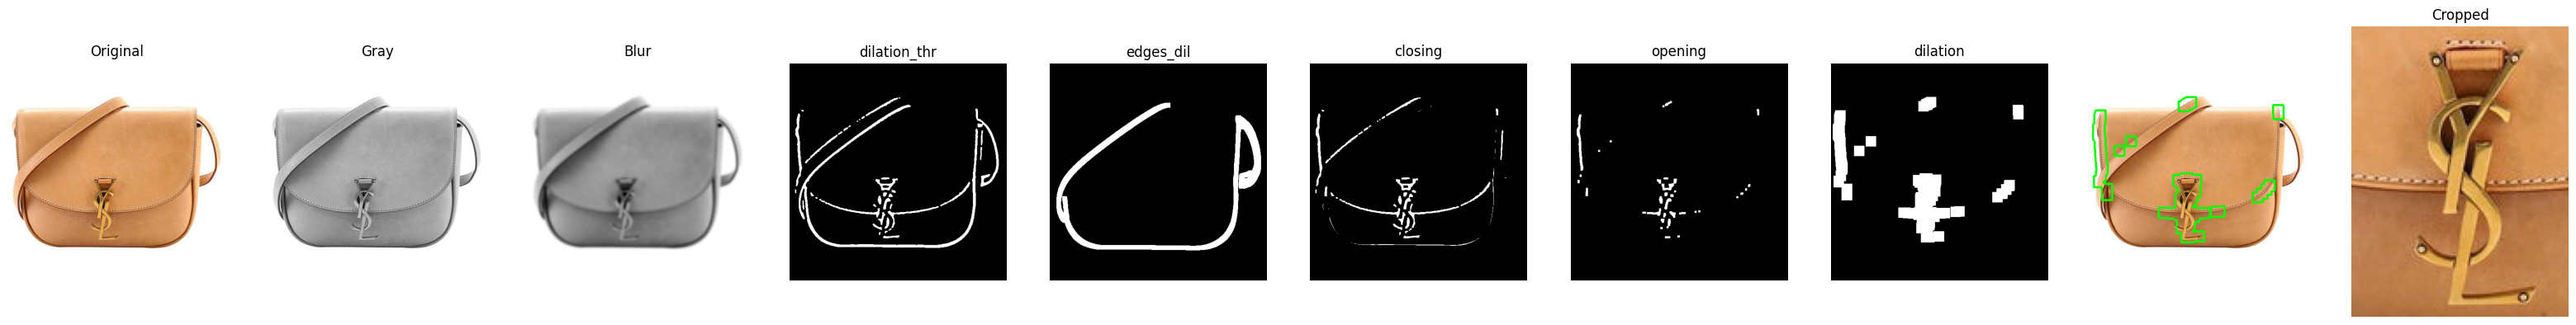

In [346]:
selected = [4]

selected_images = [data for i, data in enumerate(sorted_source_images) if i in selected]

for i, data in enumerate(selected_images):
    fig, axs = plt.subplots(1, 10, figsize=(40, 10))

    # Image segmentation with canny edge detection
    name, img = data["name"], data["image"]
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Otsu's thresholding after Gaussian filtering
    kernel = np.ones((3, 3), np.uint8)

    blur = cv.GaussianBlur(gray, (15, 15), 0)
    thr = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 2)
    closing_thr = cv.morphologyEx(thr, cv.MORPH_CLOSE, kernel)
    opening_thr = cv.morphologyEx(closing_thr, cv.MORPH_OPEN, kernel)
    dilation_thr = opening_thr

    # Canny edge detection
    edges = cv.Canny(blur, 0, 170, apertureSize=3, L2gradient=True)
    edges_dil = cv.dilate(edges, np.ones((3, 3), np.uint8), iterations=5)

    logo_edge = opening_thr - edges_dil

    # Morphological operations
    closing = cv.morphologyEx(logo_edge, cv.MORPH_CLOSE, kernel, iterations=2)
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel, iterations=2)
    dilation = cv.dilate(opening, kernel, iterations=10)
    dilation = np.where(dilation == 255, 255, 0).astype(np.uint8)

    # Fill holes
    contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Find the biggest contour (c) by the area
    c = max(contours, key=cv.contourArea)

    # Get bounding box
    x, y, w, h = cv.boundingRect(c)

    # Crop image
    crop = img[y:y+h, x:x+w]

    # Plot
    axs[0].imshow(img[..., ::-1])
    axs[0].set_title("Original")

    # Gray scale
    axs[1].imshow(gray, cmap="gray")
    axs[1].set_title("Gray")

    # Blur
    axs[2].imshow(blur, cmap="gray")
    axs[2].set_title("Blur")

    axs[3].imshow(dilation_thr, cmap="gray")
    axs[3].set_title("dilation_thr")

    axs[4].imshow(edges_dil, cmap="gray")
    axs[4].set_title("edges_dil")

    axs[5].imshow(closing, cmap="gray")
    axs[5].set_title("closing")

    axs[6].imshow(opening, cmap="gray")
    axs[6].set_title("opening")

    axs[7].imshow(dilation, cmap="gray")
    axs[7].set_title("dilation")

    # Show contours
    drawContours = cv.drawContours(img.copy(), contours, -1, (0, 255, 0), 3)
    axs[8].imshow(drawContours[..., ::-1])

    axs[9].imshow(crop[:, :, ::-1])
    axs[9].set_title("Cropped")

    axs[0].axis("off")
    axs[1].axis("off")
    axs[2].axis("off")
    axs[3].axis("off")
    axs[4].axis("off")
    axs[5].axis("off")
    axs[6].axis("off")
    axs[7].axis("off")
    axs[8].axis("off")
    axs[9].axis("off")

    # Save cropped image
    cv.imwrite(os.path.join(target_dir, name), crop)

    # Save plot
    plt.savefig(os.path.join(target_dir, "plot_" + name))
    plt.show()